# Lab 6 - Weighted Linear Fit
## *based on the lab 6 excel file
Zhirong Zhang (zhirongz@berkeley.edu)

In [113]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Preparation of Data
In this part, we first read in the data. Then we calculate the means and standard errors.

In [114]:
#Read in data from the csv file
data_table = np.loadtxt('lab6_test_dataset_csv.csv', delimiter=',', skiprows=1)

#allocate a numpy matrix for storing periods
time_table = np.zeros((9,7))

#Sort the data into the time_table
for n in list(range(1,10)):
    time_table[n-1] = data_table[:,n]

In [115]:
#mean
#axis = 1 meaning we are average each row
mean = np.mean(time_table, axis=1)
print('mean :')
print(mean)

#standard deviation
std = np.std(time_table, axis=1, ddof=1)
print('standard deviation :')
print(std)

#standard error
stderr = std/np.sqrt(7)
print('standard error')
print(stderr)

mean :
[ 4.77285714  6.44285714  7.50142857  8.47714286  9.57142857 10.39428571
 11.38142857 11.99142857 12.62428571]
standard deviation :
[0.03817254 0.06129554 0.06094494 0.11513967 0.05639993 0.07678045
 0.09546877 0.04488079 0.08676734]
standard error
[0.01442786 0.02316754 0.02303502 0.0435187  0.02131717 0.02902028
 0.0360838  0.01696335 0.03279497]


## Continue preparing data ...
Now we compute the time for each rotational period, and propagate the errors.

In [116]:
T = mean/10
alpha_T = stderr/10
T_square = np.square(T)
alpha_T_square = 2*np.multiply(T,alpha_T)

Time to move on to moment of inertia.

In [117]:
#Prepare some constant.
#LOAD YOUR OWN CONSTANTS!

#Moment of inertia of the holder
I_HOLDER = 100
#Moment of inertia of a single disk
I_DISK = 286.8

#construct moment of inertia error
n_array = np.arange(1,10)
I_array = I_HOLDER+I_DISK*n_array

Error propagation. Fun stuff!

In [118]:
alpha_holder = 3.2
alpha_disk = 6.6

alpha_I = np.sqrt(np.square(alpha_holder)+np.square(n_array)*np.square(alpha_disk))

## Non-weighted Fit

In [119]:
def model_lin(x, m, c):
    return m*x

In [120]:
lin_opt, lin_cov = opt.curve_fit(model_lin, T_square, I_array)

C:\Users\Theodore\AppData\Local\Temp\ipykernel_23336\1241160876.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  lin_opt, lin_cov = opt.curve_fit(model_lin, T_square, I_array)


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

[ 386.8  673.6  960.4 1247.2 1534.  1820.8 2107.6 2394.4 2681.2]
[0.22780165 0.41510408 0.56271431 0.71861951 0.91612245 1.08041176
 1.29536916 1.43794359 1.5937259 ]


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

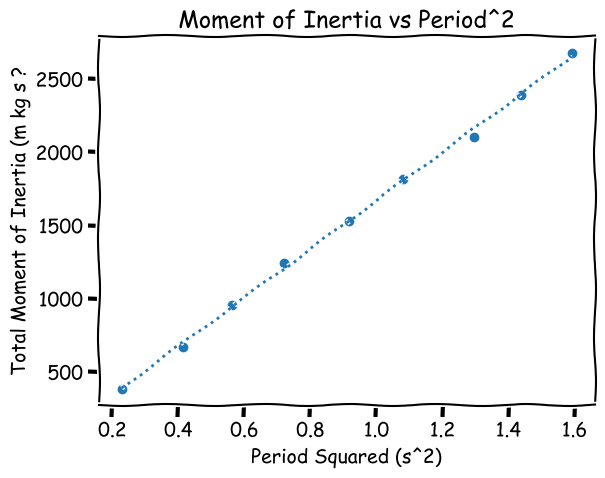

In [136]:
print(I_array)
print(T_square)

x = T_square
y = I_array
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), linestyle='dotted')
plt.scatter(x, y)
plt.title("Moment of Inertia vs Period^2")
plt.xlabel("Period Squared (s^2)")
plt.ylabel("Total Moment of Inertia (m kg s ?")
plt.xkcd()
plt.show()

## Weighted-Fit

In [122]:
alpha_I0 = lin_opt[0]*alpha_T_square

In [123]:
#The error of x is added to the error of y.
alpha_I_eq = np.sqrt(np.square(alpha_I)+np.square(alpha_I0))

In [124]:
w = 1/np.square(alpha_I_eq)

In [125]:
wx = np.multiply(T_square,w)

In [126]:
wxy = np.multiply(wx,I_array)

In [127]:
sqrt_w = np.sqrt(w)

In [128]:
x2 = np.square(T_square)
x2w = np.multiply(x2,w)

In [129]:
xw = np.multiply(w, T_square)

In [130]:
wy = np.multiply(w, I_array)

In [131]:
weighted_m = (np.sum(w)*np.sum(wxy)-np.sum(xw)*np.sum(wy))/(np.sum(w)*np.sum(x2w)-np.sum(xw)**2)

In [132]:
print(weighted_m)

1668.6057191881198
